# Regression model using StatsModels 

Importing all the required default packages 

In [57]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

Loading the housing data

In [58]:
housing_pricing = pd.read_csv('/home/rush/Projects/DataScience/models/data/raw/house_price_regression_dataset.csv')
housing_pricing.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


Checking and visualising the data and also performing EDAs 

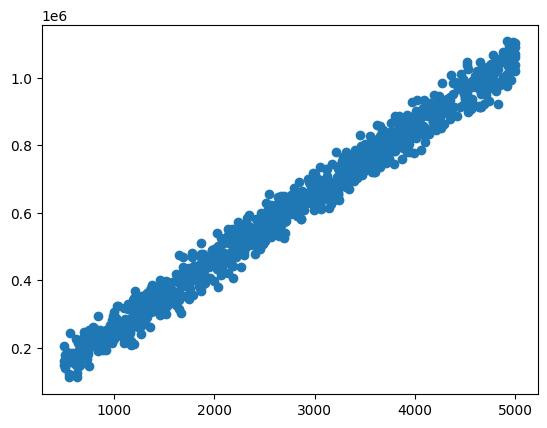

In [59]:
plt.Figure()
plt.scatter(data= housing_pricing,x= 'Square_Footage', y= 'House_Price')

<Axes: xlabel='Square_Footage', ylabel='House_Price'>

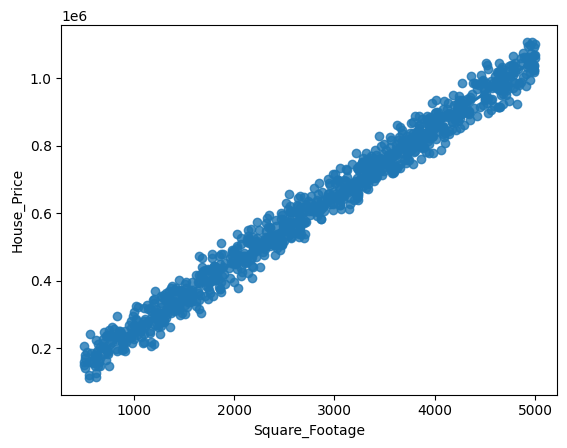

In [60]:
sns.regplot(data= housing_pricing, x= 'Square_Footage', y= 'House_Price')

Let's try to find if there are any ouliers in our data 

In [61]:
Q1 = housing_pricing.Square_Footage.quantile(0.25)
Q3 = housing_pricing.Square_Footage.quantile(0.75)

IQR = Q3-Q1

print(f'IQR: {IQR}')

sqft_low = Q1 - 1.5 * IQR
sqft_high = Q3 + 1.5 * IQR

print(f'Lowest_sqft: {sqft_low}')
print(f'Highest_sqft: {sqft_high}')

IQR: 2100.0
Lowest_sqft: -1400.5
Highest_sqft: 6999.5


let's start by importing librabies for building model using statsmodle

In [62]:
import statsmodels 
import statsmodels.api as sm
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

Let's pick our dependent and independent variables 

    1. In-Dependent variables: These are the variables that are not dependent on any other parameters 

        In our case it's [['Square_Footage']]
        
    2. Dependent variables: These are the variables that are dependent on the in-dependent variables, they change based on the parameters

        In our case it's [['House_Price']]

In [63]:
X = housing_pricing.Square_Footage
y = housing_pricing.House_Price

Now that we have our variables and data we split the data into training and test dataset

In our Case train - 70% : test  - 30%

In [64]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state= 42, test_size= 0.70
)

In [65]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')

X_train shape: (300,)
y_train shape: (300,)


When we build simple regression model using statsmodels we need to maually add the constant

In [66]:
X_train_sm = sm.add_constant(X_train)

print(X_train_sm.head)

<bound method NDFrame.head of      const  Square_Footage
788    1.0             577
640    1.0            1166
889    1.0            3208
550    1.0            2081
886    1.0            3572
..     ...             ...
106    1.0            2257
270    1.0            3894
860    1.0            1484
435    1.0            1865
102    1.0            1363

[300 rows x 2 columns]>


Now that we have the constant we can start with model building and fitting the model

In [67]:
model_build = sm.OLS(y_train, X_train_sm)
stats_model = model_build.fit()

In [68]:
stats_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            House_Price   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                 1.622e+04
Date:                Sun, 28 Sep 2025   Prob (F-statistic):          6.81e-262
Time:                        19:33:41   Log-Likelihood:                -3554.6
No. Observations:                 300   AIC:                             7113.
Df Residuals:                     298   BIC:                             7121.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           5.593e+04   4843.453     11.548      0.000    4.64e+04    6.55e+04
Square_Footage   200.1218      1.571    127.376      0.000     197.030     203.214
==============================================================================
Omnibus:                        2.844   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.241   Jarque-Bera (JB):                2.429
Skew:                           0.117   Prob(JB):                        0.297
Kurtosis:                       2.626   Cond. No.                     7.62e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Nowt that we have build a model let's run a new analysis over it and also check within the summary how our model performs 

1. Looking at R2 values : Our model can justify 98% of the variation of data.
2. P Values - Which is 0 (P>|t|) which tells how significant the variance is and how does it handle slope.
3. Prob (F-statistic) - It determines how well the model fits and if it's just good match and no luck.

Let's get a predicated values for the training dataset

In [69]:
y_train_pred = stats_model.predict(X_train_sm)
y_train_pred.head()

788    171400.964101
640    289272.709719
889    697921.444103
550    472384.165136
886    770765.782652
dtype: float64

Performing Analysis on the traning data set using Sk metrics 

In [70]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [71]:
train_R2 = r2_score(y_true= y_train, y_pred= y_train_pred)
print(train_R2)

train_MSE = mean_squared_error(y_true = y_train, y_pred= y_train_pred)
print(f'MSE for trained data: {train_MSE:.4f}')

train_MAE = mean_absolute_error(y_true = y_train, y_pred= y_train_pred)
print(f'MSE for trained data: {train_MAE:.4f}')

0.9819640927523263
MSE for trained data: 1145545648.3919
MSE for trained data: 27510.2473


Let's now move to residual analysis

ressidual = y(actual) - y(predicted)

In [72]:
res_train = y_train - y_train_pred
res_train.head()

788    14156.732380
640    30328.681821
889   -25280.657807
550   -47502.972193
886   -41380.230248
dtype: float64

/tmp/ipykernel_475009/2086060506.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res_train)


<Axes: ylabel='Density'>

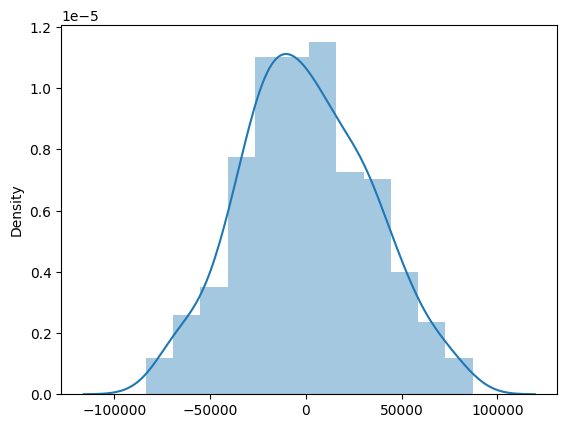

In [73]:
plt.Figure()
sns.distplot(res_train)

Text(0, 0.5, 'price')

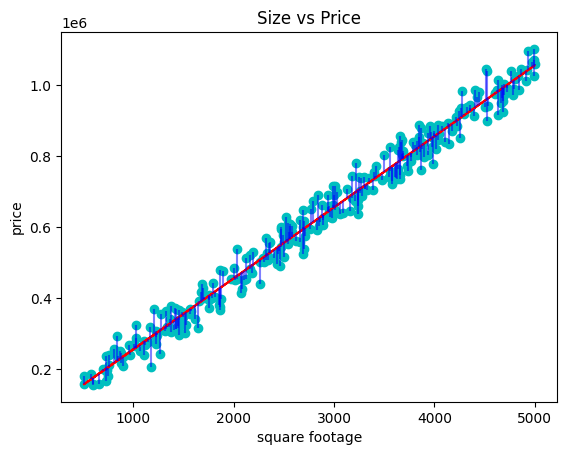

In [74]:
plt.Figure()
plt.title(label= 'Size vs Price')
plt.scatter(X_train, y_train, color= 'c')
plt.plot(X_train, y_train_pred, color= 'r')
plt.vlines(X_train, y_train_pred, y_train, colors='b', alpha=0.5)
plt.xlabel(xlabel= 'square footage')
plt.ylabel(ylabel= 'price')


Now that the results are found out let's see how it stacks with our X_train

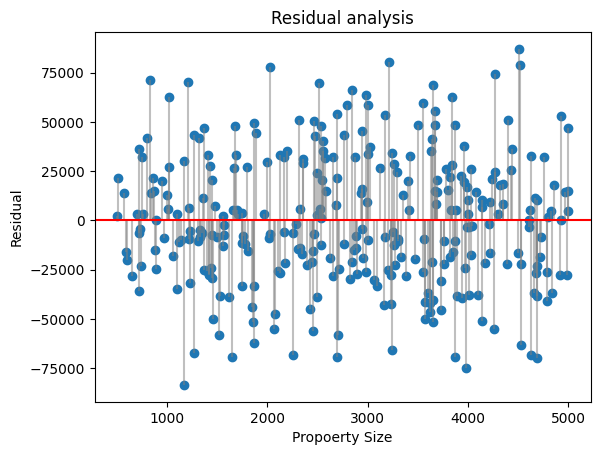

In [75]:
plt.figure()
plt.title(label='Residual analysis')
plt.scatter(X_train, res_train)
plt.vlines(X_train, 0, res_train, colors='gray', alpha=0.5)
plt.xlabel('Propoerty Size')
plt.ylabel('Residual')
plt.axhline(y=0, color= 'r')

Now that we have performed our analysis we can move to testing the model 

Befor we predict the model for our test data set 
we would need to kind the constant for the test set 

In [76]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,Square_Footage
521,1.0,4012
737,1.0,2310
740,1.0,4708
660,1.0,4932
411,1.0,3646


Let's predict the values based on the model that's genereated 

In [77]:
test_pred = stats_model.predict(X_test_sm)

Visualising the model to get a feel for how the model fits our testing dataset 

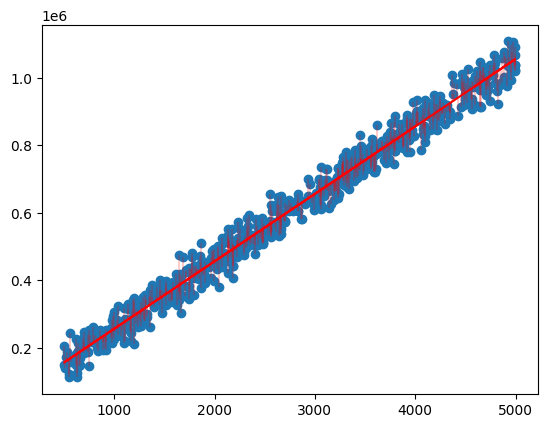

In [78]:
plt.figure()
plt.scatter(X_test, y_test)
plt.plot(X_test, test_pred, color = 'r')
plt.vlines(X_test, test_pred, y_test, color= 'r', alpha= 0.2)

Let's now analyse the testing datasets uisng R2_score as well as mean squared error and also mean absolute erroe 

In [79]:
R2_score = r2_score(y_true=y_test, y_pred= test_pred)
print(R2_score)

0.9828612474603188


In [80]:
MSE = mean_squared_error(y_true = y_test, y_pred = test_pred)
print(f'The mean squared error: {MSE:.4f}')

The mean squared error: 1106121094.7677


In [81]:
MAE = mean_absolute_error(y_true = y_test, y_pred= test_pred)
print(f'The MAE is: {MAE:.4f}')

The MAE is: 26796.7348


Let's move to the residual analysis for better understanding of the data distribution withe respect to our model 

In [82]:
test_res = y_test - test_pred
print(test_res.head())

521    42181.109535
737   -23674.547897
740   -48699.957236
660    -2542.395026
411     8435.220201
dtype: float64


/tmp/ipykernel_475009/3872751139.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test_res)


Text(0, 0.5, 'Price')

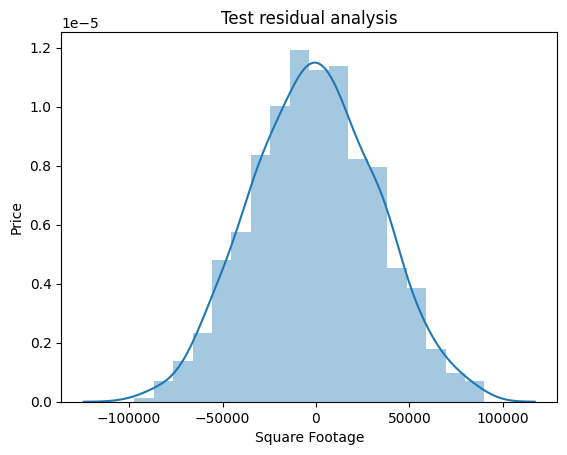

In [83]:
plt.figure()
sns.distplot(test_res)
plt.title('Test residual analysis')
plt.xlabel('Square Footage')
plt.ylabel('Price')

Let's visualise the data from other perspective of mean (simple distribution curve)

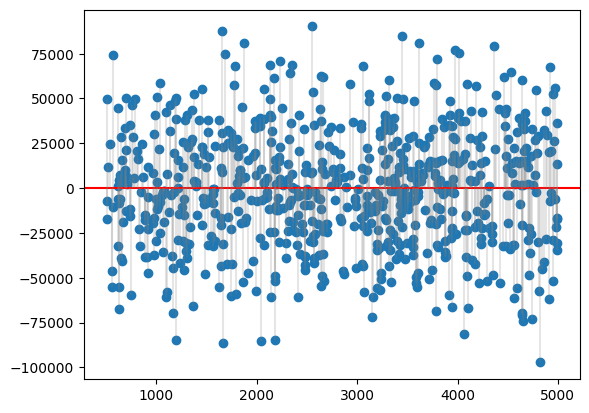

In [84]:
plt.Figure()
plt.scatter(X_test,test_res)
plt.axhline(y=0, color= 'r')
plt.vlines(X_test, 0 , test_res, color = 'grey', alpha = 0.2)

The spread of the data can be due to the larger data set and since linear model can be used it's better to pick a model that can use these multiple extreeme cases and 
soften the whole result

From the analysis and the data we can confirm that the model that is generated fits the dataset and can predict 
98% of the data presented 

# Using Sklearn

Importing the necessary libraries

In [85]:
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error 
from sklearn.linear_model import LinearRegression

Let's define our variable

In [86]:
X = housing_pricing.Square_Footage
y = housing_pricing.House_Price

Now that we have our variables let's split our train and test data sets

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 52, train_size= 0.70)

Let's understand the shaps of the split variables 

In [88]:
print(' Training Data set ')
print(f'\nThe X_train shape: {X_train.shape}')
print(f'The y_train shape: {y_train.shape}\n')

print(' Test Data set ')
print(f'\nThe X_test shape: {X_test.shape}')
print(f'The y_train shape: {y_test.shape}')

 Training Data set 

The X_train shape: (700,)
The y_train shape: (700,)

 Test Data set 

The X_test shape: (300,)
The y_train shape: (300,)


For creating a simple ligeration model using sklearn while fitting the model it will have a missmatched shape

In [89]:
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

In [90]:
print(f'\nThe X_train shape: {X_train.shape}')
print(f'\nThe X_test shape: {X_test.shape}')


The X_train shape: (700, 1)

The X_test shape: (300, 1)


Now that the shape match there is what we do next 

Creating object for linear regression

In [91]:
sk_model = LinearRegression()

Now that we have created a object we now,

Let's fit our data into the object


In [92]:
sk_model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Now let's look at the paramets that our model had come up with 

In [97]:
print(f'The Slope is: {sk_model.coef_:}')
print(f'The intersecpt is: {sk_model.intercept_:.2f}')

The Slope is: [199.34293269]
The intersecpt is: 58051.07


Let's predict the model on the train and the test sets

In [100]:
y_train_pred = sk_model.predict(X_train)
y_test_pred = sk_model.predict(X_test)

Now that we have predicted the values we can evaluate and compare the train and test datasets with the model 

Let's get started with R2 score 

In [102]:
R2_train = r2_score(y_true = y_train, y_pred = y_train_pred)
R2_test = r2_score(y_true= y_test, y_pred= y_test_pred)

print(f'Train R square score: {R2_train:.4f}')
print(f'Test R square score: {R2_test:.4f}')

Train R square score: 0.9829
Test R square score: 0.9817


Let's also get the mean squared errors as well 

In [103]:
MSE_train = mean_squared_error(y_true= y_train, y_pred = y_train_pred)
MSE_test = mean_squared_error(y_true= y_test, y_pred = y_test_pred)

print(f'Train MSE: {MSE_train:.4f}')
print(f'Test MSE: {MSE_test:.4f}')

Train MSE: 1084156637.6544
Test MSE: 1200385135.4809


We can also test for mean absolute error

In [104]:
MAE_train = mean_absolute_error(y_true = y_train, y_pred= y_train_pred)
MAE_test = mean_absolute_error(y_true= y_test, y_pred= y_test_pred)

print(f'Train MAE: {MAE_train:.4f}')
print(f'Test MAE: {MAE_test:.4f}')

Train MAE: 26485.8404
Test MAE: 28380.5717


Let's also evaluate it maually with residual analysis

In [109]:
train_res = y_train - y_train_pred
print(train_res.head())

test_res = y_test - y_test_pred
print(f'\n {test_res.head()}')

787   -28732.034965
406   -12273.607385
325    34794.220829
461    19476.235453
221    -1347.523548
Name: House_Price, dtype: float64

 198    -1507.148007
639    -9598.245084
109    -4168.174065
618    28208.051883
314    -9684.677128
Name: House_Price, dtype: float64


Text(0, 0.5, 'House Price')

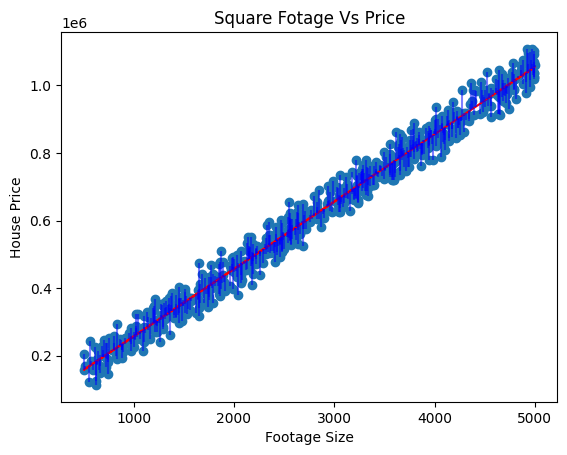

In [117]:
plt.figure()
plt.title('Square Fotage Vs Price')
plt.scatter(X_train, y_train)
plt.plot(X_train, y_train_pred, color = 'r')
plt.vlines(X_train, y_train_pred, y_train, color= 'b', alpha = 0.5)
plt.xlabel('Footage Size')
plt.ylabel('House Price')

Text(0, 0.5, 'House Price')

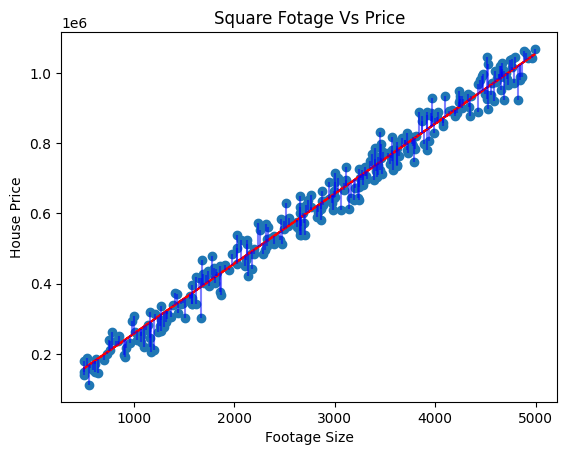

In [118]:
plt.figure()
plt.title('Square Fotage Vs Price')
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, color = 'r')
plt.vlines(X_test, y_test_pred, y_test, color= 'b', alpha = 0.5)
plt.xlabel('Footage Size')
plt.ylabel('House Price')

Let's look at the other residual analysis 

/tmp/ipykernel_475009/809417922.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_res)


<Axes: xlabel='House_Price', ylabel='Density'>

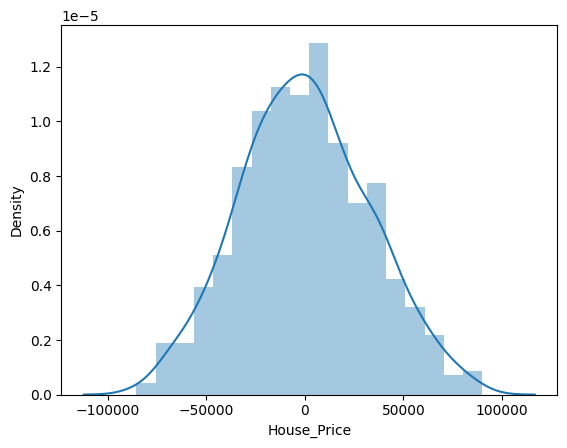

In [120]:
plt.figure()
sns.distplot(train_res)

/tmp/ipykernel_475009/2557346587.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test_pred)


<Axes: ylabel='Density'>

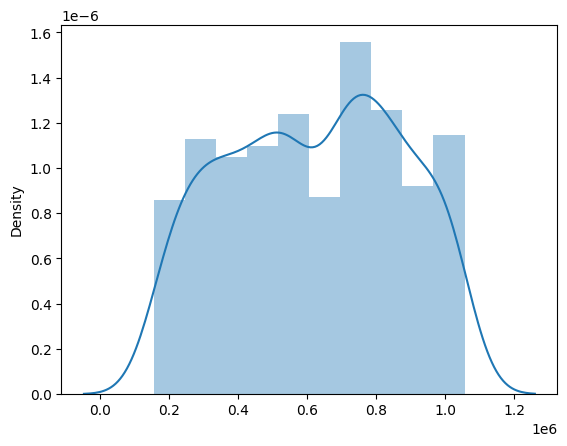

In [121]:
plt.figure()
sns.distplot(test_pred)

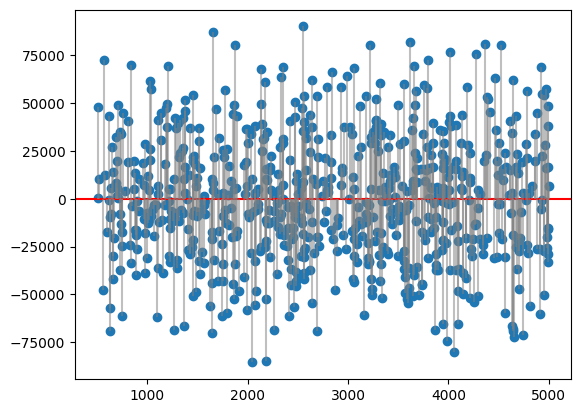

In [127]:
plt.figure()
plt.scatter(X_train, train_res)
plt.axhline(y=0, color = 'r')
plt.vlines(X_train, 0, train_res, color= 'grey', alpha = 0.5)


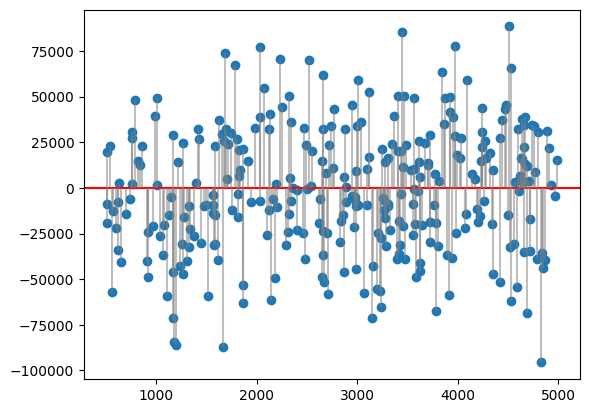

In [128]:
plt.figure()
plt.scatter(X_test, test_res)
plt.axhline(y=0, color = 'r')
plt.vlines(X_test, 0, test_res, color= 'grey', alpha = 0.5)
